# Социальное происхождение

In [1]:
import pandas as pd
import json
import plotly.express as px
from tqdm import tqdm_notebook

In [2]:
# Prepare and filter data
df = pd.read_csv('data/mb_khabarovsk.csv')
dfw = df[['id', 'social_background']].copy()
del df
dfw = dfw.fillna('')

In [4]:
# Load hand-prepared replacement list
with open('replacements/social_background.json') as json_file:
    replacements = json.load(json_file)

In [5]:
# Proceed replacements
dfw['социальное происхождение'] = ''
for repl in replacements:
    dfw.loc[(dfw['social_background'].str.contains(repl[0])) & (dfw['социальное происхождение'] == ''), 'социальное происхождение'] = repl[1]
    

In [6]:
# Check for missing or non-clean values
dfw[(dfw['социальное происхождение'] == '') & (dfw['social_background'] != '')]

,id,social_background,социальное происхождение
15291,67881,"Книга памяти Псковской обл., т. 3",


In [7]:
# Final preparaion for export and graphs
dfw.drop(columns=['social_background'], inplace=True)
dfw['социальное происхождение'] = dfw['социальное происхождение'].replace('', 'нет данных')

In [8]:
# Save result to csv
dfw.to_csv('data/social_background.csv', index=False)

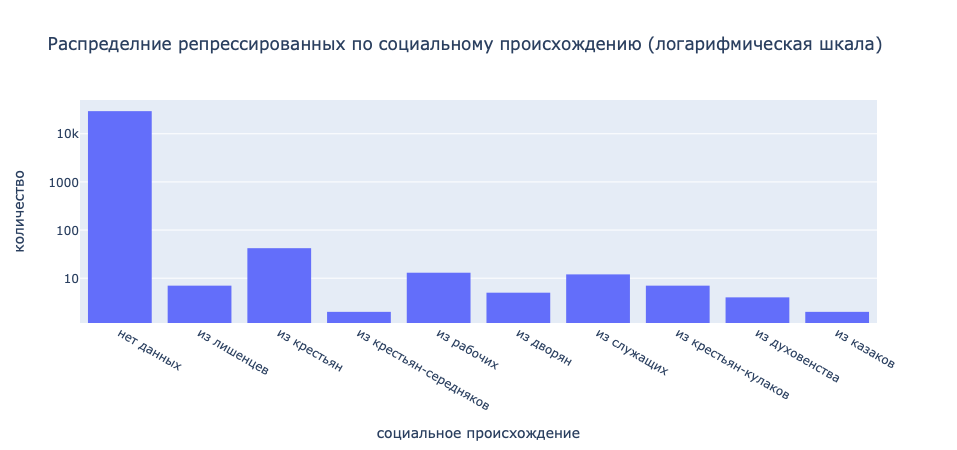

In [10]:
fig = px.histogram(dfw, 
                   x="социальное происхождение", 
                   title='Распределние репрессированных по социальному происхождению (логарифмическая шкала)',
                  log_y=True)
fig.update_layout(
    yaxis_title_text='количество', # yaxis label

)
fig.show()